In [1]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [2]:
DATApath = '/Volumes/home/Research/STEP/02_Station_result_csv/2010-2020_*_classify'

In [3]:
APMphi = 65

In [4]:
newdf=pd.DataFrame()
for csvpath in glob.glob(f'{DATApath}/*csv'):
    
    df = pd.read_csv(csvpath)
    dff = df[df['Pick']==True][df['Null']==False][df['Quality']!='Poor'][df['SNRQ']>=5]
    
    newdf=pd.concat([newdf,dff])

    
        

/var/folders/sp/pnngww1n0q31w2plgbk53rc00000gn/T/ipykernel_6726/1097628682.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dff = df[df['Pick']==True][df['Null']==False][df['Quality']!='Poor'][df['SNRQ']>=5]


Text(0.5, 0, 'Delay Time (s)')

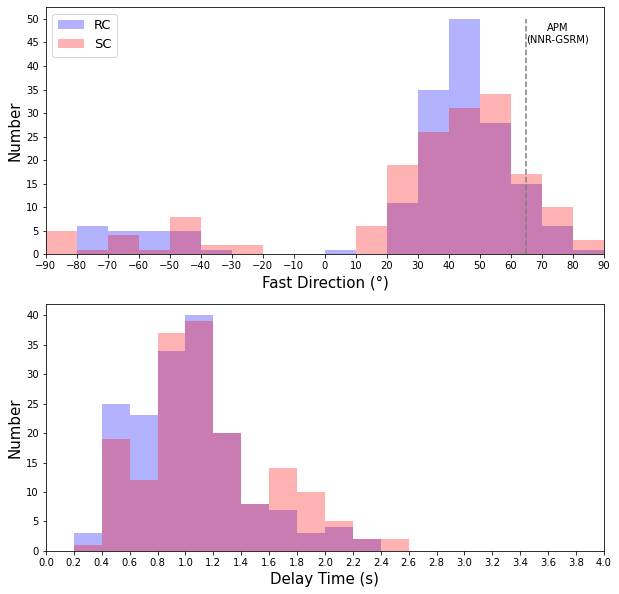

In [25]:
plt.figure(figsize=(10,10))
bin_phi=np.arange(-90,90+1,10)
ax1 = plt.subplot(211)
nR,binsS,jR=plt.hist(newdf['RCPhi'],bins=bin_phi, width=10, alpha=0.3,color='blue',label='RC')
nS,binsS,jR=plt.hist(newdf['SCPhi'],bins=bin_phi, width=10, alpha=0.3,color='red',label='SC')

plt.xlabel('Fast Direction (°)',fontsize=15)
plt.ylabel('Number',fontsize=15)
ax1.xaxis.set_major_locator(MultipleLocator(10))
ax1.yaxis.set_major_locator(MultipleLocator(5))
ax1.set_xlim(-90,90)
ax1.vlines(x=APMphi,ymin=0,ymax=max(max(nS),max(nR)),color='grey',linestyle='--')
ax1.text(x=APMphi+10,y=max(max(nS),max(nR))-5,s='APM\n(NNR-GSRM)',ha='center',color='black',fontsize=10)
ax1.legend(loc=2,fontsize=13)

ax2 = plt.subplot(212)
bin_dt=np.arange(0,4+0.1,0.2)
nR,binsS,jR=plt.hist(newdf['RCdt'],bins=bin_dt, width=0.2, alpha=0.3,color='blue',label='RC')
nS,binsS,jR=plt.hist(newdf['SCdt'],bins=bin_dt, width=0.2, alpha=0.3,color='red',label='SC')
ax2.xaxis.set_major_locator(MultipleLocator(0.2))
ax2.yaxis.set_major_locator(MultipleLocator(5))
ax2.set_xlim(0,4)
plt.ylabel('Number',fontsize=15)
plt.xlabel('Delay Time (s)',fontsize=15)
# ax1.text(x=APMphi+10,y=max(max(nS),max(nR))-5,s='APM\n(NNR-GSRM)',ha='center',color='black',fontsize=10)